<center>
<font size='7' style="color:#0D47A1">  <b>Self organizing maps (SOM)</b> </font>
</center>

<hr style= "height:3px;">
<br> 

<br>
<br>
<br>
<font size='6' style="color:#00A6D6">  <b>Introduction</b> </font>

How to order this color mesh automatically?

![SOM 1](SOM1.png)

Self-organizing maps is a discretized representation of the multidimensional input space of the training samples in a 2D map of nodes and is therefore a method to do dimensionality reduction. One application of SOM is about poverty information in the world. http://neupy.com/2017/12/09/sofm_applications.html

![SOM 2](SOM2.png)

In this kind of artificial neuronal network, there are no hidden layers, only the input and output layers. The map space is defined beforehand, usually as a finite two-dimensional region where nodes are arranged in a regular hexagonal or rectangular grid. There are no lateral connections between nodes within the lattice.

Each node has a specific topological position (an x, y coordinate in the lattice) and contains a vector of weights of the same dimension as the input vectors. The scheme of SOM is:

![SOM 3](SOM3.png)

<br>
<br>
<br>
<font size='6' style="color:#00A6D6">  <b>Algorithm</b> </font>

* Initialize each node’s weights randomly
* Choose a random vector from training data and present it to the SOM
* Calculate the distance between the input vector and the weights of each node, according to 

\begin{equation*}
D = \sqrt {\sum_{i=1}^n{(x_i-W_i)}^2} 
\end{equation*}

Compare the distances among all nodes, the lowest value distance is defined as the Best Matching Unit (BMU).

* Calculate the neighborhood radius around BMU by 

\begin{equation*}
\sigma (t) = \sigma_0 \exp \left(\frac {-t}{\lambda}\right) 
\end{equation*}

\begin{equation*}
\lambda = \frac {n}{ln \sigma_0} 
\end{equation*}

Where $\sigma$ $(t)$ is the radius of neighborhood at step $t$, $t$ is the iteration step, $\sigma_0$ is the initial radius of the complete array nodes, $\lambda$ is a normalization factor, and $n$ is total number of iterations. 

![SOM 4](SOM4.png)

In each iteration the neighborhood changes of size.

![SOM 5a](SOM5a.png)

* Change the weights of each node in the BMU’s neighborhood in order to become more like the BMU. Nodes closest to the BMU are altered more than the nodes furthest away in  the neighborhood according to

\begin{equation*}
 W (t+1) =  W(t) + \Theta(t) L(t) \left ( x - W(t) \right) 
\end{equation*}

\begin{equation*}
L(t) = L_0 \exp \left ( \frac{-t}{\lambda} \right)
\end{equation*}

\begin{equation*}
\Theta (t) = \exp \Biggl( \frac{-d^2}{2 \sigma^2(t)} \Biggr)  
\end{equation*}

Where $W(t+1)$  is a new weight, $W(t)$ the old weight, $L_0$ is called learning factor, $d$ is the distance between a neighbor node and BMU, and $\Theta$ is a factor that takes into account the neighborhood.

* Repeat steps for all vectors over enough iterations for convergence

The node obtains a color according to with the factor $D$ and the chosen vector. If a node is close to a BMU it is similar but it is far away, then it is different.  

![SOM6a](SOM6a.png)

![SOM6b](SOM6b.png)

There are some details that are from the criteria as well as how many neurons to use?, which is the value of learning rate $L_0$? and how many iterations $n$ are needed.

<br>
<br>
<br>
<font size='6' style="color:#00A6D6">  <b>Strengths/Weaknesses</b> </font>

<br>
<br>
<br>
<font size='6' style="color:#00A6D6">  <b>Summary</b> </font>

<br>
<br>
<br>
<font size='6' style="color:#00A6D6">  <b>Example</b> </font>

Imagine that you are in a valley where the hight is determined by a fractal. The group of people is spread across the land and everyone wants to stay in sight of the others at similar hight.
In this example, the people is our nodes. We will use the SOM algorithm to make the people gather in clusters.

You will first find the person with similar hight, and call that person the BMU. Now everyone that is close enought to be seen, will be your local nbh and they will approach the BMU. This local nbh will shrink with time. Notice that when there are abrupt changes on hight the BMU may not be in your local nbh.

The following algorithm implements the previous stragety, we will use the nbh radius as before but the weights will be updated with the rule $ W(t+1) =  W(t) + c \left ( x - W(t) \right) $.

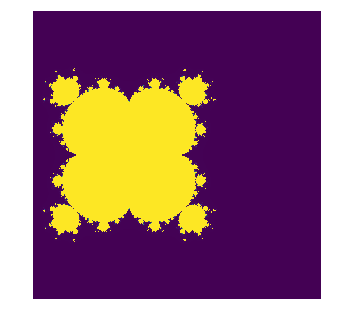

In [37]:
%matplotlib inline

import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import cmath
from copy import copy

class node():
    """The points consist of a coordinate and the color."""
    def __init__(self,x,y,v):
        self.c = x+y*1j
        self.v = v


def mandelbrot( h,w, maxit=500 ):
    """Returns an image of a variant of the Mandelbrot fractal of size (h,w)."""
    y,x = np.ogrid[ -1.5:1.5:h*1j, -1:2:w*1j ]
    c = x+y*1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)

    for i in tqdm_notebook(range(maxit)):
        z = z**5 + c
        diverge = z*np.conj(z) > 2**2            # who is diverging
        div_now = diverge & (divtime==maxit)  # who is diverging now
        divtime[div_now] = i                  # note when
        z[diverge] = 2                        # avoid diverging too much

    return divtime


Mandel = mandelbrot(500,500)

fig = plt.figure()

ax = fig.add_axes([0., 0., 1., 1., ])
# Hide grid lines
ax.grid(False)
ax.axis('off')
# Hide axes ticks

plt.imshow(Mandel)
plt.show()

This will be the valley.

In [38]:
###Here we define the auxiliary functions        
def decay(iteration,totalIterations):
    return np.exp(-iteration/totalIterations)

def findNbh(indexX,indexY,nodes, sigma):# a local NBH of nodes[indexX][indexY] of radius sigma
    copyNodes=np.ravel(nodes)
    OrderedCopyNodes = sorted(copyNodes, key=lambda item: abs(item.c- nodes[indexX][indexY].c))
    ind = 0
    initial = OrderedCopyNodes[ind]
    while abs(initial.c- nodes[indexX][indexY].c)<sigma:
        ind = ind + 1
        initial = OrderedCopyNodes[ind]
    return OrderedCopyNodes[:ind]
def findBMU(indexX,indexY,nodes):# the node that has closest value
    copyNodes=np.ravel(nodes)
    OrderedCopyNodes = sorted(copyNodes, key=lambda item: abs(item.v- nodes[indexX][indexY].v))
    return OrderedCopyNodes[:5][1]



In the following image, the nodes are the people.

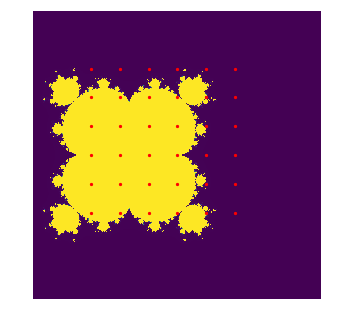

--In iteration  0  we have radius  100.0


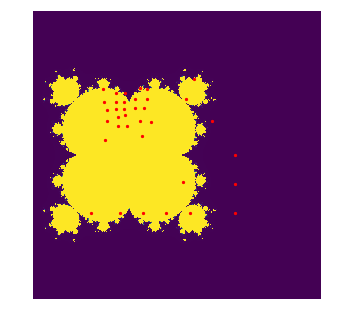

--In iteration  1  we have radius  31.62277660168379


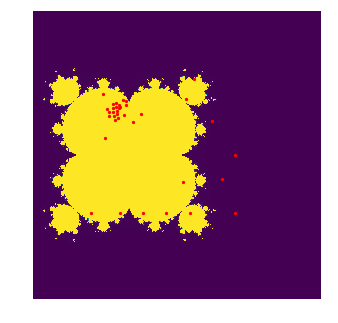

--In iteration  2  we have radius  9.999999999999998


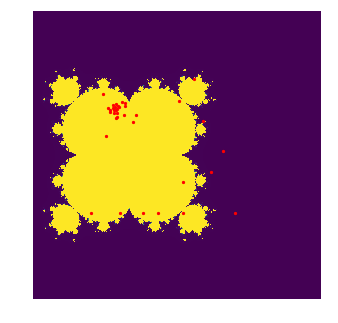

--In iteration  3  we have radius  3.1622776601683786


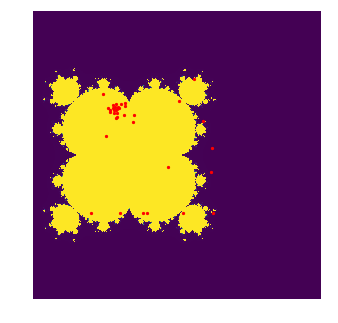

In [41]:

### We are going to select nodes on the Mandelbrot set
nodes = np.zeros((6,6),dtype=object)
for x_values in range(2,8):
    for y_values in range(2,8):
        nodes[x_values-2][y_values-2]=node(50*x_values,50*y_values,Mandel[50*x_values,50*y_values])
        
fig = plt.figure()

ax = fig.add_axes([0., 0., 1., 1., ])
# Hide grid lines
ax.grid(False)
ax.axis('off')
# Hide axes ticks

plt.imshow(Mandel)

copyNodes = np.ravel(nodes)
for mark in tqdm_notebook(copyNodes):
    plt.scatter(mark.c.real, mark.c.imag, s=5, c='red', marker='o')

plt.show()



### parameters
numberOfIterations = 4
sigma_0=100
L_0=.1

for iteration in tqdm_notebook(range(numberOfIterations)):
    dist = sigma_0*decay(iteration,numberOfIterations/np.log(sigma_0))
    print('--In iteration ', iteration,' we have radius ',dist)
    for i in range(20):
        x_values = np.random.randint(0,6)
        y_values = np.random.randint(0,6)
        BMUc = findBMU(x_values,y_values,nodes).c
        for nearNodes in findNbh(x_values,y_values,nodes, dist):
            nearNodes.c  = nearNodes.c + L_0*(BMUc-nearNodes.c)
            nearNodes.v = Mandel[int(nearNodes.c.real)%500, int(nearNodes.c.imag)%500]       
    Julia2 = copy(Mandel)
    fig = plt.figure()

    ax = fig.add_axes([0., 0., 1., 1., ])
    # Hide grid lines
    ax.grid(False)
    ax.axis('off')
    # Hide axes ticks

    plt.imshow(Julia2)

    copyNodes = np.ravel(nodes)
    for mark in copyNodes:
        plt.scatter(mark.c.real, mark.c.imag, s=5, c='red', marker='o')
    plt.show()


You can find other nice 3D representations of SOM in:

https://demogng.de/js/demogng.html?model=SOM 

<br>
<br>
<br>
<font size='6' style="color:#00A6D6">  <b>Homework</b> </font>

This homework is based on https://github.com/ANNetGPGPU/ANNetGPGPU

Modify the code so that:
    
    The nodes don't move. 

    Instead, after we select a node, we calculate a radius of a nbh and then we change the color (weight) of the pixels in that nbh to the color in the center.
    The code should have just a couple of iterations.
    On each iteration only 4 nodes are selected randomly.



Try modifying the background image, use a picture or modify the way we color the local nbh. 
![SOM 8](SOM8.png)

    
Try this code with other images.
<br>
<br>
<br>
<font size='6' style="color:#00A6D6">  <b>References</b> </font>

http://www.ai-junkie.com/ann/som/som1.html (info)

https://www.youtube.com/watch?v=_Euwc9fWBJw (video)

http://neupy.com/2017/12/09/sofm_applications.html (applications)

http://blog.yhat.com/posts/self-organizing-maps-2.html  (python code)

https://demogng.de/js/demogng.html?model=SOM  (demo 3D)

https://github.com/ANNetGPGPU/ANNetGPGPU (art application)




